<h1 align=center><font size = 8>Child of Change</font></h1>

<div class="right"> 
<center>
<img src="./arm_haitien.jpg"  alt="drawing" width="110"/> 
</center>
</div>

# Objective

# Hypothesis or research question

# Project plan

* [Introduction](#introduction)
* [Haitian demographics](#demographics)
* [Data source](#source)
* [Data cleaning](#cleaning)
* [Data analysis](#analysis)
* [Reflections](#Reflections)

# Introduction <a name="Introduction"></a>

Haiti is a Caribbean country located on the island of Hispaniola, a territory it shares with the Dominican Republic to the east.    

Haiti is a country with a young age structure. The 15 to 65 year olds make up 60% of the population. In a context of demographic transition, young people (15-24 years) have reached 21% of the population. Approximately 220,000 young people of both sexes will have reached the age of 15 each year, which is the age to enter the labour market or to engage in vocational training. Adolescents between the ages of 10 and 19 make up about 22% of the population.

# Haitian demographics <a name="Haitian demographics"></a>
<div class="left"> 
<center>
<img src="./Dr_hatien.png"  alt="drawing" width="50"/> 
</center>
</div>

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel(r'hti_adminboundaries_tabulardata.xlsx') # Load the xlxs
df.at[0,'IHSI_UNFPA_2019']

12893401.77166053

In [2]:
print('Haiti has {} haitians including {} females and {} males.'.format(df.at[0,'IHSI_UNFPA_2019'], df.at[0,'IHSI_UNFPA_2019_female'], df.at[0,'IHSI_UNFPA_2019_male']))

Haiti has 12893401.77166053 haitians including 6511669 females and 6381732 males.


In [3]:
import folium 

In [4]:
latitude= 19.0558462 
longitude= -73.0513321
map_ht = folium.Map(location=[latitude, longitude],zoom_start=8,tiles='CartoDB positron')
map_ht

In [5]:
df2 = pd.read_excel(r'hti_adminboundaries_tabulardata.xlsx',sheet_name='hti_pop2019_adm1')
df2

,adm0code,adm0_en,adm0_fr,adm0_ht,adm1code,adm1_en,adm1_fr,adm1_ht,IHSI_UNFPA_2019,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male
0,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,5.010206e+06,2587360,2422846
1,HT,Haiti,Haïti,Ayiti,HT02,South-East,Sud-Est,Sidès,8.939007e+05,448111,445790
2,HT,Haiti,Haïti,Ayiti,HT03,North,Nord,Nò,1.159762e+06,589825,569932
3,HT,Haiti,Haïti,Ayiti,HT04,North-East,Nord-Est,Nòdès,4.444631e+05,221501,222966
4,HT,Haiti,Haïti,Ayiti,HT05,Artibonite,Artibonite,Latibonit,2.047153e+06,1034065,1013085
5,HT,Haiti,Haïti,Ayiti,HT06,Centre,Centre,Sant,8.455942e+05,413649,431947
6,HT,Haiti,Haïti,Ayiti,HT07,South,Sud,Sid,7.910850e+05,382084,409000
7,HT,Haiti,Haïti,Ayiti,HT08,Grande'Anse,Grande'Anse,Grandans,4.810653e+05,229914,251152
8,HT,Haiti,Haïti,Ayiti,HT09,North-West,Nord-Ouest,Nòdwès,8.685806e+05,437975,430605
9,HT,Haiti,Haïti,Ayiti,HT10,Nippes,Nippes,Nip,3.515933e+05,167185,184409


In [6]:
df_final1= df2.drop ([ 'adm0_fr' ,  'adm0_ht' ,'adm1_ht', 'adm1_fr'],  axis = 1 )
df_final1.rename(columns = {'adm0code':'Code', 'adm1code':'Depart_code', 
                              'IHSI_UNFPA_2019':'Total', 'IHSI_UNFPA_2019_female':'Female','IHSI_UNFPA_2019_male':'Male' }, inplace = True)

In [7]:
df_final1.sort_values(by ='adm1_en', inplace= True)
Df= df_final1.reset_index()
Df

,index,Code,adm0_en,Depart_code,adm1_en,Total,Female,Male
0,4,HT,Haiti,HT05,Artibonite,2.047153e+06,1034065,1013085
1,5,HT,Haiti,HT06,Centre,8.455942e+05,413649,431947
2,7,HT,Haiti,HT08,Grande'Anse,4.810653e+05,229914,251152
3,9,HT,Haiti,HT10,Nippes,3.515933e+05,167185,184409
4,2,HT,Haiti,HT03,North,1.159762e+06,589825,569932
5,3,HT,Haiti,HT04,North-East,4.444631e+05,221501,222966
6,8,HT,Haiti,HT09,North-West,8.685806e+05,437975,430605
7,6,HT,Haiti,HT07,South,7.910850e+05,382084,409000
8,1,HT,Haiti,HT02,South-East,8.939007e+05,448111,445790
9,0,HT,Haiti,HT01,West,5.010206e+06,2587360,2422846


In [8]:
df_final= Df.drop(['index'], axis=1)
df_final

,Code,adm0_en,Depart_code,adm1_en,Total,Female,Male
0,HT,Haiti,HT05,Artibonite,2.047153e+06,1034065,1013085
1,HT,Haiti,HT06,Centre,8.455942e+05,413649,431947
2,HT,Haiti,HT08,Grande'Anse,4.810653e+05,229914,251152
3,HT,Haiti,HT10,Nippes,3.515933e+05,167185,184409
4,HT,Haiti,HT03,North,1.159762e+06,589825,569932
5,HT,Haiti,HT04,North-East,4.444631e+05,221501,222966
6,HT,Haiti,HT09,North-West,8.685806e+05,437975,430605
7,HT,Haiti,HT07,South,7.910850e+05,382084,409000
8,HT,Haiti,HT02,South-East,8.939007e+05,448111,445790
9,HT,Haiti,HT01,West,5.010206e+06,2587360,2422846


In [9]:
#Add latitude & longitude column
df_final.insert(4, "lat", [19.4504,19.1430,18.6339,18.4411,19.7592,19.6656,19.9318,18.5410,18.2004,18.2350], True)


In [10]:
df_final.insert(5, "lng", [-72.6832, -72.0040, -74.1184, -73.0883,-72.2125, -71.8448, -72.8295, -72.3360, -73.7500, -72.5370], True)
df_final

,Code,adm0_en,Depart_code,adm1_en,lat,lng,Total,Female,Male
0,HT,Haiti,HT05,Artibonite,19.4504,-72.6832,2.047153e+06,1034065,1013085
1,HT,Haiti,HT06,Centre,19.1430,-72.0040,8.455942e+05,413649,431947
2,HT,Haiti,HT08,Grande'Anse,18.6339,-74.1184,4.810653e+05,229914,251152
3,HT,Haiti,HT10,Nippes,18.4411,-73.0883,3.515933e+05,167185,184409
4,HT,Haiti,HT03,North,19.7592,-72.2125,1.159762e+06,589825,569932
5,HT,Haiti,HT04,North-East,19.6656,-71.8448,4.444631e+05,221501,222966
6,HT,Haiti,HT09,North-West,19.9318,-72.8295,8.685806e+05,437975,430605
7,HT,Haiti,HT07,South,18.5410,-72.3360,7.910850e+05,382084,409000
8,HT,Haiti,HT02,South-East,18.2004,-73.7500,8.939007e+05,448111,445790
9,HT,Haiti,HT01,West,18.2350,-72.5370,5.010206e+06,2587360,2422846


Text(0, 0.5, 'Total')

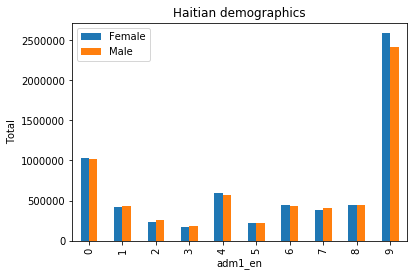

In [58]:
from matplotlib import pyplot as plt
df_final.reset_index ().plot (
    x = "index" , y = [ "Female" , "Male" ] , kind = "bar"
)
plt. title ( "Haitian demographics" )
plt. xlabel ( "adm1_en" )
plt. ylabel ( "Total" )

In [62]:
# one hot encoding
female_onehot = pd.get_dummies(df_final[['adm1_en']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
female_onehot['Female'] = df_final['Female'] 

# move neighborhood column to the first column
fixed_columns = [female_onehot.columns[-1]] + list(female_onehot.columns[:-1])
female_onehot = female_onehot[fixed_columns]

female_onehot.head()

,Female,Artibonite,Centre,Grande'Anse,Nippes,North,North-East,North-West,South,South-East,West
0,1034065,1,0,0,0,0,0,0,0,0,0
1,413649,0,1,0,0,0,0,0,0,0,0
2,229914,0,0,1,0,0,0,0,0,0,0
3,167185,0,0,0,1,0,0,0,0,0,0
4,589825,0,0,0,0,1,0,0,0,0,0


In [ ]:
# pull some graph
def demographics():
    print()
    print(format('generate my grouped BAR plot','*^82'))

    import warnings
    warnings.filterwarnings("ignore")
    
import matplotlib.pyplot as plt #import librairy

 

    # Plotting the bars
      fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with female data
      plt.bar(pos, df['Female'], width= 0.25, alpha=0.5, color='#EE3224')
    #plt.show()

    # Create a bar with male data,
      plt.bar([p + width for p in pos], df['Female'], width= 0.25, alpha=0.5, color='#EE3224')
    #plt.show()

    # Create a bar with post_score data,
      plt.bar([p + width*2 for p in pos], df['Male'], width= 0.25, alpha=0.5, color='#F78F1E')
    #plt.show()

    # Set the y axis label
      ax.set_ylabel('Total')

    # Set the chart's title
      ax.set_title('Haitian demographics ')

    # Set the position of the x ticks
      ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
      ax.set_xticklabels(df['adm1_en'])

   

    # Adding the legend and showing the plot
    plt.legend(['Female', 'Male'], loc='upper left')
    plt.grid()
    plt.show()

demographics()

In [11]:
df_final.to_csv (r"Haiti_Data", index = False)

In [12]:
from folium.plugins import MarkerCluster
from folium.map import Icon

In [13]:
#Create haitian map with coordinates of each department
latitude= 19.0558462 
longitude= -73.0513321
map_haiti = folium.Map(location=[latitude, longitude], zoom_start=9, tiles='CartoDB positron')
marker_cluster = MarkerCluster().add_to(map_haiti)

for lat, lng, Total, Female, Male in zip(df_final['lat'], df_final['lng'], df_final['Total'], df_final['Female'],df_final['Male']):
    label = 'Total: {}, Female: {}, Male: {}'.format(round(Total,0), Female, Male)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        #radius=5,
        popup=label,
        #color='blue',
        #fill=True,
        #fill_color='#3186cc',
        #fill_opacity=0.7,
        #parse_html=False,
        icon=Icon(color='red', icon_color='yellow', icon='check-circle',prefix='fa')).add_to(marker_cluster)  
    
map_haiti

# Data source <a name="Data source"></a>

**Keys indicateur of young aged 15-24**

In [14]:
import urllib.request # import librairy needed
# specify the URL/web page we are going to be scraping
url="https://dhsprogram.com/topics/Youth-Corner/haiti-dhs-key-indicators.cfm"

In [15]:
# open the url using urllib.request
page = urllib.request.urlopen(url)

In [16]:
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

In [17]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

In [18]:
# to look at HTML underlying our chosen web page
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <!-- Content Copyright Macro International -->
 <!-- Page generated 2020-08-04 16:12:29 on server 1 by CommonSpot Build 10.6.0.30 (2019-10-04 12:35:29) -->
 <!-- JavaScript & DHTML Code Copyright &copy; 1998-2019, PaperThin, Inc. All Rights Reserved. -->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Haiti DHS Key Indicators" id="Description" name="Description"/>
  <meta content="CommonSpot Build 10.6.0.30" id="Generator" name="Generator"/>
  <title>
   The DHS Program - Haiti DHS Key Indicators
  </title>
  <style id="cs_antiClickjack">
   body{display:none !important;position:absolute !important;top:-5000px !important;}
  </style>
  <script type="text/javascript">
   (function(){var chk=0;try{if(self!==top){var ts=top.document.location.href.split('/');var ws=window.document.location.href.split('/');if(ts.length<3||ws.length<3)chk=1;else if(ts[2]!==ws[2])chk=2;else if(ts[0]!==ws[0])chk=3;}}catch(e){chk=

In [19]:
# tags bring back the 'title' and the data between the start and end 'title' tags
soup.title

# refine a step further by specifying the 'string' element and only bring back the content without the title' tags
soup.title.string

'The DHS Program - Haiti DHS Key Indicators'

In [20]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML 
all_tables=soup.find_all("table")
all_tables

[<table align="center" cellpadding="0" cellspacing="0" style="" width="100%">
 <tbody>
 <tr>
 <td align="left" style=""> </td>
 <td style="text-align: center;" width="15%"><strong>Women</strong></td>
 <td style="text-align: center;" width="15%"><strong>Men</strong></td>
 </tr>
 <tr>
 <td style="">Number of youth interviewed:</td>
 <td style="text-align: center;">4,704</td>
 <td style="text-align: center;">2,104</td>
 </tr>
 <tr>
 <td style="">Number of youth who had sex in the 12 months preceding the survey:</td>
 <td style="text-align: center;">2,344</td>
 <td style="text-align: center;">1,247</td>
 </tr>
 <tr>
 <td style="">Number of young women who had a live birth in 5 years preceding the survey:</td>
 <td style="text-align: center;">1,195</td>
 <td style="text-align: center;">na</td>
 </tr>
 </tbody>
 </table>,
 <table align="center" border="0" cellpadding="0" cellspacing="0" id="indicators" style="" summary="Key Indicators of Youth" width="100%">
 <tbody>
 <tr>
 <td style="" widt

In [21]:
right_table=soup.find(id="indicators" )
trs =right_table.find_all('tr') 

In [22]:
trs[4:8]

[<tr>
 <td class="tdmarginsubhd" colspan="3" style="">Percentage of youth who cannot read</td>
 </tr>,
 <tr>
 <td class="tdmargintext_bdltbt" style="">15-19</td>
 <td class="tdmargintext_bdltbt_nopad" style="">17.9</td>
 <td class="tdmargintext_bdltbtrt_nopad" style="">15.3</td>
 </tr>,
 <tr>
 <td class="tdmargintext_bdltbt" style="">20-24</td>
 <td class="tdmargintext_bdltbt_nopad" style="">19.1</td>
 <td class="tdmargintext_bdltbtrt_nopad" style="">12.8</td>
 </tr>,
 <tr>
 <td class="tdmargintext_bdltbt_itlc" style="">15-24</td>
 <td class="tdmargintext_bdltbt_nopad_itlc" style="">18.5</td>
 <td class="tdmargintext_bdltbtrt_nopad_itlc" style="">14.2</td>
 </tr>]

In [27]:
variable_name,age_group,women,men=[],[],[],[]
for tr in trs:
    tds = tr.find_all('td')
    if len(tds) == 1:
        variable= tds[0].get_text().strip()
    if len(tds) == 3:
        variable_name.append(variable)
        age_group.append(tds[0].get_text().strip())
        women.append(tds[1].get_text().strip())
        men.append(tds[2].get_text().strip())
    
df = pd.DataFrame(dict(variable_name=variable_name,age_group=age_group,women=women,men=men))    

NameError: name 'variable' is not defined

In [28]:
def load_table(url,start,end):
    variable_name,age_group,women,men,variable =[],[],[],[],''
    page = urllib.request.urlopen(url)
    variable_name,age_group,women,men=[],[],[],[]
    soup = BeautifulSoup(page, "lxml")
    for tr in trs[start:end]:
        tds = tr.find_all('td')
        if len(tds) == 1:
            variable = tds[0].get_text().strip()
        if len(tds) == 3:
            variable_name.append(variable)
            age_group.append(tds[0].get_text().strip())
            women.append(tds[1].get_text().strip())
            men.append(tds[2].get_text().strip())

    df = pd.DataFrame(dict(variable_name=variable_name,age_group=age_group,women=women,men=men))
    return df

In [29]:
df1 =load_table(url='https://dhsprogram.com/topics/Youth-Corner/haiti-dhs-key-indicators.cfm',start=4,end=19)

In [30]:
df1

,variable_name,age_group,women,men
0,Percentage of youth who cannot read,15-19,17.9,15.3
1,Percentage of youth who cannot read,20-24,19.1,12.8
2,Percentage of youth who cannot read,15-24,18.5,14.2
3,Percentage of youth with completed primary edu...,15-19,48.8,45.0
4,Percentage of youth with completed primary edu...,20-24,60.0,69.4
5,Percentage of youth with completed primary edu...,15-24,53.6,55.4
6,Percentage of youth exposed to at least one me...,15-19,82.8,87.8
7,Percentage of youth exposed to at least one me...,20-24,82.6,91.2
8,Percentage of youth exposed to at least one me...,15-24,82.7,89.2


In [31]:
df2= load_table(url='https://dhsprogram.com/topics/Youth-Corner/haiti-dhs-key-indicators.cfm',start=24,end=34)

In [32]:
df2

,variable_name,age_group,women,men
0,Percentage of youth currently married,15-19,5.7,0.4
1,Percentage of youth currently married,20-24,29.9,8.3
2,Percentage of youth currently married,15-24,16.0,3.7
3,Percentage of youth currently living together,15-19,10.9,1.7
4,Percentage of youth currently living together,20-24,23.8,9.0
5,Percentage of youth currently living together,15-24,16.4,4.8


In [33]:
df3= load_table(url='https://dhsprogram.com/topics/Youth-Corner/haiti-dhs-key-indicators.cfm',start=38,end=47)

In [34]:
df3

,variable_name,age_group,women,men
0,Percentage of youth who had sexual intercourse...,15-19,15.3,41.9
1,Percentage of youth who had sexual intercourse...,20-24,13.5,43.7
2,Percentage of youth who had sexual intercourse...,15-24,14.6,42.7
3,Percentage of youth who had sexual intercourse...,18-24,54.8,75.6
4,Median age at first sexual intercourse,18-24,u,14.5


In [35]:
df4= load_table(url='https://dhsprogram.com/topics/Youth-Corner/haiti-dhs-key-indicators.cfm',start=60,end=65)

In [36]:
df4

,variable_name,age_group,women,men
0,2.1 Teenage pregnancy and motherhood,Percentage of youth (age 15-19) who have begun...,14.0,na
1,2.1 Teenage pregnancy and motherhood,Percentage of youth age 15-19 who have ever be...,14.5,na


In [37]:
df5= load_table(url='https://dhsprogram.com/topics/Youth-Corner/haiti-dhs-key-indicators.cfm',start=69,end=80)

In [38]:
df5

,variable_name,age_group,women,men
0,Percentage of youth currently using a modern c...,15-19,7.5,na
1,Percentage of youth currently using a modern c...,20-24,19.5,na
2,Percentage of youth currently using a modern c...,15-24,12.6,na
3,Percentage of sexually active youth who have e...,15-19,59.9,na
4,Percentage of sexually active youth who have e...,20-24,70.6,na
5,Percentage of sexually active youth who have e...,15-24,67.2,na


In [39]:
df6=load_table(url='https://dhsprogram.com/topics/Youth-Corner/haiti-dhs-key-indicators.cfm',start=100,end=105)

In [40]:
df6

,variable_name,age_group,women,men
0,Percentage of youth who have had sexual interc...,15-19,22.6,na
1,Percentage of youth who have had sexual interc...,20-24,20.0,na
2,Percentage of youth who have had sexual interc...,15-24,20.9,na


In [42]:
# merge all df df1 to df6
dtf= df1.append(df2, ignore_index=True)
dtf

,variable_name,age_group,women,men
0,Percentage of youth who cannot read,15-19,17.9,15.3
1,Percentage of youth who cannot read,20-24,19.1,12.8
2,Percentage of youth who cannot read,15-24,18.5,14.2
3,Percentage of youth with completed primary edu...,15-19,48.8,45.0
4,Percentage of youth with completed primary edu...,20-24,60.0,69.4
5,Percentage of youth with completed primary edu...,15-24,53.6,55.4
6,Percentage of youth exposed to at least one me...,15-19,82.8,87.8
7,Percentage of youth exposed to at least one me...,20-24,82.6,91.2
8,Percentage of youth exposed to at least one me...,15-24,82.7,89.2
9,Percentage of youth currently married,15-19,5.7,0.4


In [43]:
dtf1=dtf.append(df3,ignore_index= True)
dtf1

,variable_name,age_group,women,men
0,Percentage of youth who cannot read,15-19,17.9,15.3
1,Percentage of youth who cannot read,20-24,19.1,12.8
2,Percentage of youth who cannot read,15-24,18.5,14.2
3,Percentage of youth with completed primary edu...,15-19,48.8,45.0
4,Percentage of youth with completed primary edu...,20-24,60.0,69.4
5,Percentage of youth with completed primary edu...,15-24,53.6,55.4
6,Percentage of youth exposed to at least one me...,15-19,82.8,87.8
7,Percentage of youth exposed to at least one me...,20-24,82.6,91.2
8,Percentage of youth exposed to at least one me...,15-24,82.7,89.2
9,Percentage of youth currently married,15-19,5.7,0.4


In [44]:
dtf2= dtf1.append(df4, ignore_index=True)
dtf2

,variable_name,age_group,women,men
0,Percentage of youth who cannot read,15-19,17.9,15.3
1,Percentage of youth who cannot read,20-24,19.1,12.8
2,Percentage of youth who cannot read,15-24,18.5,14.2
3,Percentage of youth with completed primary edu...,15-19,48.8,45.0
4,Percentage of youth with completed primary edu...,20-24,60.0,69.4
5,Percentage of youth with completed primary edu...,15-24,53.6,55.4
6,Percentage of youth exposed to at least one me...,15-19,82.8,87.8
7,Percentage of youth exposed to at least one me...,20-24,82.6,91.2
8,Percentage of youth exposed to at least one me...,15-24,82.7,89.2
9,Percentage of youth currently married,15-19,5.7,0.4


In [45]:
dtf3=dtf2.append(df5, ignore_index=True)
dtf3

,variable_name,age_group,women,men
0,Percentage of youth who cannot read,15-19,17.9,15.3
1,Percentage of youth who cannot read,20-24,19.1,12.8
2,Percentage of youth who cannot read,15-24,18.5,14.2
3,Percentage of youth with completed primary edu...,15-19,48.8,45.0
4,Percentage of youth with completed primary edu...,20-24,60.0,69.4
5,Percentage of youth with completed primary edu...,15-24,53.6,55.4
6,Percentage of youth exposed to at least one me...,15-19,82.8,87.8
7,Percentage of youth exposed to at least one me...,20-24,82.6,91.2
8,Percentage of youth exposed to at least one me...,15-24,82.7,89.2
9,Percentage of youth currently married,15-19,5.7,0.4


In [46]:
dtf4= dtf3.append(df6, ignore_index=True)
dtf4

,variable_name,age_group,women,men
0,Percentage of youth who cannot read,15-19,17.9,15.3
1,Percentage of youth who cannot read,20-24,19.1,12.8
2,Percentage of youth who cannot read,15-24,18.5,14.2
3,Percentage of youth with completed primary edu...,15-19,48.8,45.0
4,Percentage of youth with completed primary edu...,20-24,60.0,69.4
5,Percentage of youth with completed primary edu...,15-24,53.6,55.4
6,Percentage of youth exposed to at least one me...,15-19,82.8,87.8
7,Percentage of youth exposed to at least one me...,20-24,82.6,91.2
8,Percentage of youth exposed to at least one me...,15-24,82.7,89.2
9,Percentage of youth currently married,15-19,5.7,0.4


In [47]:
#convert dataframe in csv file
dtf4.to_csv (r"Keys indicateur", index = False)

In [87]:
! pip install pyreadstat

In [3]:
#country-specific
url='./DATTTT specifique au pays/HTCHA7AFLSR.SAS7BDAT'
df_cs = pd. read_sas(url,encoding='latin8')

In [4]:
df_cs

,INV_ID,SF32LINE,SF3203,SF3204,SF3205,SF3208
0,1.776582e-307,1.776582e-307,1.783536e-307,1.783536e-307,2010.0,5.0
1,1.780059e-307,1.776582e-307,1.783536e-307,1.780059e-307,2001.0,5.0
2,1.783536e-307,1.780059e-307,1.783536e-307,1.780059e-307,2016.0,6.0
3,1.776582e-307,1.780059e-307,1.783536e-307,1.783536e-307,2007.0,6.0
4,1.780059e-307,1.780059e-307,1.780059e-307,1.780059e-307,2011.0,9.0
...,...,...,...,...,...,...
3996,3.121000e+03,8.000000e+00,2.000000e+00,2.000000e+00,2.0,1998.0
3997,3.241000e+03,1.000000e+00,1.000000e+00,3.000000e+00,2.0,2014.0
3998,3.241000e+03,2.000000e+00,2.000000e+00,2.000000e+00,2.0,2014.0
3999,3.241000e+03,3.000000e+00,2.000000e+00,2.000000e+00,2.0,2014.0


In [5]:
# retrieve all columns need
colums = list(set(df_cs.columns))
colums

['SF32LINE', 'SF3205', 'SF3203', 'INV_ID', 'SF3204', 'SF3208']

In [6]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INV_ID    4001 non-null   float64
 1   SF32LINE  4001 non-null   float64
 2   SF3203    4001 non-null   float64
 3   SF3204    4001 non-null   float64
 4   SF3205    4001 non-null   float64
 5   SF3208    4001 non-null   float64
dtypes: float64(6)
memory usage: 187.7 KB


In [7]:
#prenatal care
url='./DATTT soins prenatalr recod/HTAN7AFLSR.SAS7BDAT'
df_pc= pd. read_sas(url,encoding='latin8')

In [8]:
df_pc

,INV_ID,P_ID,OBS_N,OBS_ID,C000,C001,C002,C003,C004,C004P,...,C177,C178,C179,C180,C181,C182,C183,C184,SOA110Y,SOA115Y
0,1.794835e-307,103.0,7A,1.776582e-307,N,111.0,1.776582e-307,3.0,1.794835e-307,103.0,...,-1.517710e+82,7.290232e-304,-1.517710e+82,7.290232e-304,0.000000e+00,0.0,0.0,0.000000e+00,131072.0,1.038290e+98
1,1.794835e-307,106.0,7A,1.776582e-307,N,111.0,1.776582e-307,3.0,1.794835e-307,106.0,...,-1.517710e+82,7.290232e-304,-2.447307e+83,7.290232e-304,1.783536e-307,0.0,0.0,0.000000e+00,2093056.0,1.038290e+98
2,1.803527e-307,108.0,7A,1.776582e-307,N,111.0,1.776582e-307,3.0,1.803527e-307,108.0,...,-1.517710e+82,7.290232e-304,-1.517710e+82,7.290232e-304,0.000000e+00,0.0,0.0,1.776582e-307,2093056.0,1.038290e+98
3,1.803527e-307,109.0,7A,1.776582e-307,N,111.0,1.776582e-307,3.0,1.803527e-307,109.0,...,-1.517710e+82,7.290232e-304,-1.517710e+82,7.290232e-304,0.000000e+00,0.0,0.0,1.776582e-307,2093056.0,1.038290e+98
4,1.803527e-307,115.0,7A,1.776582e-307,N,111.0,1.776582e-307,3.0,1.803527e-307,115.0,...,-1.517710e+82,7.290232e-304,-1.517710e+82,7.290232e-304,0.000000e+00,0.0,0.0,0.000000e+00,2093056.0,1.038290e+98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,3.201000e+03,3.0,AN,1.020000e+02,HT7,5.0,5.210000e+02,2.0,3.201000e+03,3.0,...,3.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,0.0,0.0,0.000000e+00,0.0,1.000000e+00
1524,3.241000e+03,5.0,AN,1.010000e+02,HT7,4.0,4.340000e+02,2.0,3.241000e+03,5.0,...,3.000000e+00,2.000000e+00,NaN,0.000000e+00,NaN,2.0,0.0,0.000000e+00,0.0,1.000000e+00
1525,3.245000e+03,1.0,AN,1.010000e+02,HT7,2.0,2.110000e+02,2.0,3.245000e+03,1.0,...,2.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,0.0,0.0,0.000000e+00,1.0,1.000000e+00
1526,3.261000e+03,2.0,AN,1.010000e+02,HT7,1.0,1.410000e+02,2.0,3.261000e+03,2.0,...,3.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,0.0,0.0,0.000000e+00,1.0,1.000000e+00


In [9]:
colums = list(set(df_pc.columns))
colums

['C107P',
 'C171C',
 'CF106XB',
 'C502E',
 'C172Y',
 'C104J',
 'C105D1',
 'C104I',
 'C517A',
 'C170H',
 'C004CT',
 'C104C',
 'C503',
 'C508',
 'C106Y',
 'C176',
 'C111',
 'C003',
 'C156',
 'C108',
 'C116',
 'C106R',
 'C181',
 'C106C',
 'C161',
 'C119C',
 'C111E',
 'C179',
 'C160B',
 'C107F',
 'C122A',
 'C122Y',
 'C121A',
 'C121H',
 'C004CN',
 'C518B',
 'C160A',
 'C167A',
 'C172B',
 'C177',
 'C106P',
 'C103B',
 'C103C',
 'C107Y3',
 'C104D',
 'C105E',
 'C111C',
 'C120Y',
 'C119Y',
 'C000',
 'C154',
 'C105Y',
 'C178',
 'C518A',
 'C107D',
 'C001',
 'C022',
 'C111A',
 'C120A',
 'CF106XA',
 'C121Y',
 'C167C',
 'C009C',
 'C020A',
 'C105C',
 'C118',
 'C104H',
 'C121C',
 'C172A',
 'C105G',
 'C184',
 'C170Z',
 'C152',
 'C171B',
 'C166',
 'C170B',
 'C105F',
 'C105F1',
 'C160X',
 'C119A',
 'C105B',
 'C033D',
 'C515',
 'C521',
 'C105D',
 'C106Q',
 'C151',
 'C522',
 'CF106XG',
 'C180',
 'C107E',
 'C104E',
 'C170I',
 'C103Y',
 'OBS_ID',
 'C160Z',
 'C170D',
 'SCDEPART',
 'C150',
 'C105Y1',
 'C103A',
 

In [85]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Columns: 235 entries, INV_ID to SOA115Y
dtypes: float64(232), object(3)
memory usage: 2.7+ MB


In [86]:
df_pc.describe

<bound method NDFrame.describe of              INV_ID   P_ID OBS_N         OBS_ID C000   C001           C002  \
0     1.794835e-307  103.0    7A  1.776582e-307    N  111.0  1.776582e-307   
1     1.794835e-307  106.0    7A  1.776582e-307    N  111.0  1.776582e-307   
2     1.803527e-307  108.0    7A  1.776582e-307    N  111.0  1.776582e-307   
3     1.803527e-307  109.0    7A  1.776582e-307    N  111.0  1.776582e-307   
4     1.803527e-307  115.0    7A  1.776582e-307    N  111.0  1.776582e-307   
...             ...    ...   ...            ...  ...    ...            ...   
1523   3.201000e+03    3.0    AN   1.020000e+02  HT7    5.0   5.210000e+02   
1524   3.241000e+03    5.0    AN   1.010000e+02  HT7    4.0   4.340000e+02   
1525   3.245000e+03    1.0    AN   1.010000e+02  HT7    2.0   2.110000e+02   
1526   3.261000e+03    2.0    AN   1.010000e+02  HT7    1.0   1.410000e+02   
1527   3.262000e+03    2.0    AN   1.010000e+02  HT7    6.0   6.210000e+02   

      C003           C004  C0

Codes for Note column:
1.  Subject matter same or similar, but codes can differ.  Check carefully.
2.  Created variables used for country report, included for the first time in a recode of a SPA
3.  Existed in earlier recode(s) as country-specific codes
4. For providers, earlier SPAs coded training in last year as '1' and training in previous
2-3 years as 2; new SPA codes training in past 2 years as '1' and earlier training as '2'.


In [69]:
dict_data = pd.read_excel(r'SPA_Data_Dictionary_HTSR7A.xlsx',sheet_name='Clients')
dict_data.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Codes for Note column:
0,NaN,NaN,NaN,NaN,"1. Subject matter same or similar, but codes ..."
1,NaN,NaN,NaN,NaN,"2. Created variables used for country report,..."
2,NaN,NaN,NaN,NaN,3. Existed in earlier recode(s) as country-sp...
3,NaN,NaN,NaN,NaN,"4. For providers, earlier SPAs coded training ..."
4,NaN,NaN,NaN,NaN,2-3 years as 2; new SPA codes training in past...
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,Questionnaire,New Recode,Old Recode,Note,Label
8,ccnn,C000,C000,NaN,Survey phase
9,DEPART,C001,C001,NaN,Department (Country-specific)


In [76]:
#delete some rows
dict_data = dict_data.loc[8:,:]
dict_data.rename(columns={'Unnamed: 0': 'Questionnaire', 'Unnamed: 1': 'New Recode', 'Unnamed: 2': 'Old Recode', 'Unnamed: 3': 'Note','Codes for Note column:': 'Label' }, index={}, inplace=True)

dict_data.reset_index(drop= True, inplace = True)
dict_data.head()

,Questionnaire,New Recode,Old Recode,Note,Label
0,ccnn,C000,C000,NaN,Survey phase
1,DEPART,C001,C001,NaN,Department (Country-specific)
2,VILCOM,C002,C002,NaN,Commune (Country-specific)
3,FTYPE,C003,C003,NaN,Urban/rural
4,DEPARTFR,SCDEPART,NaN,NaN,CS - Department with West separated from metro...


In [77]:
dict_data.to_csv (r"Dict_soins_prenat", index = False)

In [12]:
dict_data_country = pd.read_excel(r'SPA_Data_Dictionary_HTSR7A.xlsx',sheet_name='CS - Data Quality Review')
dict_data_country.loc[5:,:]
dict_data_country.rename(columns={'Unnamed: 0': 'Questionnaire', 'Unnamed: 1':'New Recode', 'Unnamed: 2': 'Label' }, index={}, inplace=True)
dict_data_country.reset_index(drop=True, inplace= True)
dict_data_country

,Questionnaire,New Recode,Label
0,Data Quality Review: Country Specific module a...,NaN,NaN
1,NaN,NaN,NaN
2,Questionnaire,New Recode,Label
3,FACIL,INV_ID,Facility identification
4,NaN,NaN,NaN
...,...,...,...
156,Q32LINE,SF32LINE,Line number
157,Q3203,SF3203,Sex
158,Q3204,SF3204,Education level
159,Q3205,SF3205,Agent type


,Questionnaire,New Recode,Label
0,Data Quality Review: Country Specific module a...,NaN,NaN
1,NaN,NaN,NaN
2,Questionnaire,New Recode,Label
3,FACIL,INV_ID,Facility identification
4,NaN,NaN,NaN
...,...,...,...
156,Q32LINE,SF32LINE,Line number
157,Q3203,SF3203,Sex
158,Q3204,SF3204,Education level
159,Q3205,SF3205,Agent type


In [81]:
dict_data_country.to_csv (r"Dict_spef_country", index = False)

# Data cleaning <a name="Data cleaning"></a>

# Data analysis <a name="Data analysis"></a>

## Descriptive statistical analysis <a name="Descriptive statistical analysis"></a>

## Distribution of variables <a name="Distribution of variables"></a>

## Outliers in the dataset

# Reflections <a name="Reflections"></a>

## Summary of data analysis <a name="Summary of data analysis"></a>

## Question unanswered <a name="Question unanswered"></a>

## Recommandations <a name="Recommandation"></a>